# Task 1 (20 points): Advanced Objective Function and Use Case

---

## 1. Deriving the Logistic Regression Objective Function via MLE

### 1.1. Setup and Likelihood

Consider a binary classification problem with data $(\mathbf{x}^{(i)}, y^{(i)})$, where:

- $\mathbf{x}^{(i)} \in \mathbb{R}^n$ is the feature vector for the $i$-th sample.
- $y^{(i)} \in \{0, 1\}$ is the class label.

For Logistic Regression, we model the probability that $y^{(i)} = 1$ as:

$$
P\bigl(y^{(i)} = 1 \mid \mathbf{x}^{(i)}, \boldsymbol{\theta}\bigr) = \sigma\bigl(\boldsymbol{\theta}^T \mathbf{x}^{(i)}\bigr),
$$

where $\sigma(z)$ is the sigmoid function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}.
$$

We can write:

$$
P\bigl(y^{(i)} = 0 \mid \mathbf{x}^{(i)}, \boldsymbol{\theta}\bigr) = 1 - \sigma\bigl(\boldsymbol{\theta}^T \mathbf{x}^{(i)}\bigr).
$$

---

### 1.2. Likelihood Function

Assuming i.i.d. (independent and identically distributed) data, the likelihood $\mathcal{L}(\boldsymbol{\theta})$ is:

$$
\mathcal{L}(\boldsymbol{\theta}) = \prod_{i=1}^{m} \sigma\bigl(\boldsymbol{\theta}^T \mathbf{x}^{(i)}\bigr)^{y^{(i)}}
\Bigl[1 - \sigma\bigl(\boldsymbol{\theta}^T \mathbf{x}^{(i)}\bigr)\Bigr]^{1 - y^{(i)}}.
$$

---

### 1.3. Log-Likelihood

To simplify, we take the log of the likelihood (the **log-likelihood**):

$$
\ell(\boldsymbol{\theta}) = \sum_{i=1}^{m} \Bigl[
    y^{(i)} \log\bigl(\sigma(\boldsymbol{\theta}^T \mathbf{x}^{(i)})\bigr)
    + (1 - y^{(i)}) \log\bigl(1 - \sigma(\boldsymbol{\theta}^T \mathbf{x}^{(i)})\bigr)
\Bigr].
$$

---

### 1.4. MLE Objective Function

The Maximum Likelihood Estimation (MLE) approach maximizes $\ell(\boldsymbol{\theta})$, or equivalently minimizes the **negative log-likelihood**:

$$
J(\boldsymbol{\theta}) = - \ell(\boldsymbol{\theta}) = - \sum_{i=1}^{m} \Bigl[
    y^{(i)} \log\bigl(\sigma(\boldsymbol{\theta}^T \mathbf{x}^{(i)})\bigr)
    + (1 - y^{(i)}) \log\bigl(1 - \sigma(\boldsymbol{\theta}^T \mathbf{x}^{(i)})\bigr)
\Bigr].
$$

This function is also known as the **binary cross-entropy loss**.

---

### 2. MAP Technique vs. MLE

#### 2.1. Overview of MAP

MLE focuses solely on maximizing the likelihood $\mathcal{L}(\boldsymbol{\theta})$ based on observed data.  
MAP (**Maximum A Posteriori**) incorporates a **prior distribution** $p(\boldsymbol{\theta})$. Instead of maximizing $P(\mathbf{y} \mid \mathbf{X}, \boldsymbol{\theta})$ alone, we maximize the **posterior** $p(\boldsymbol{\theta} \mid \mathbf{X}, \mathbf{y})$:

$$
\boldsymbol{\theta}_{MAP} = \arg \max_{\boldsymbol{\theta}} \Bigl[
    p(\mathbf{y} \mid \mathbf{X}, \boldsymbol{\theta}) \, p(\boldsymbol{\theta})
\Bigr].
$$

Taking logs:

$$
\boldsymbol{\theta}_{MAP} = \arg \max_{\boldsymbol{\theta}} \Bigl[
    \log p(\mathbf{y} \mid \mathbf{X}, \boldsymbol{\theta}) + \log p(\boldsymbol{\theta})
\Bigr].
$$

---

### 2.2. Difference Between MLE and MAP

- **MLE** can be seen as a special case of MAP where the prior $p(\boldsymbol{\theta})$ is uniform (i.e., no prior preference).
- **MAP** allows incorporating domain knowledge or regularization into the model (e.g., Gaussian prior leads to **L2** regularization).

Thus, **MAP** solutions often help prevent overfitting by penalizing large parameter values, providing a more robust estimate when data is limited.

#### Citations:
1. Bishop, C. M. (2006). *Pattern Recognition and Machine Learning.* Springer.  
2. Murphy, K. P. (2012). *Machine Learning: A Probabilistic Perspective.* MIT Press.  
3. Ng, A. (2004). *Feature Selection, L1 vs. L2 Regularization, and Rotational Invariance.* (Stanford CS229 Lecture Notes)

---

## 3. Defining a Machine Learning Problem & Justification

### 3.1. Proposed Machine Learning Problem

**Use Case**: **Email Spam Classification**

- **Goal**: Predict whether an incoming email is spam (1) or not spam (0).  
- **Data**: Features might include word frequencies, presence of certain keywords, sender domain, etc.

---

### 3.2. Why Logistic Regression?

- **Probabilistic Output**: Logistic regression directly provides $P(\text{spam} \mid \mathbf{x})$, which is useful for thresholding or ranking by spam probability.
- **Interpretability**: We can easily interpret coefficients (e.g., certain keywords have high positive weights, meaning they strongly indicate spam).
- **Efficiency**: For moderate-to-large datasets, logistic regression is relatively fast to train and often yields robust performance.

---

### 3.3. Comparison to Another Linear Model: Linear SVM (Briefly)

- **Linear SVM** also tries to separate spam vs. not spam with a hyperplane but focuses on maximizing the margin.
- **Difference**: SVM does not provide a direct probability output; it focuses on the decision boundary.
- **When to choose LR**: If you need probability estimates, logistic regression is more natural.
- **When to choose SVM**: If you primarily want a robust margin-based classifier and can handle a separate calibration step for probabilities if needed.

(Reference: Cortes, C. & Vapnik, V. (1995). Support-vector networks.)

---

## 4. Mapping Dataset Variables to the Logistic Regression Equations

Assume we have a dataset $\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^m$:

- $\mathbf{x}^{(i)}$: A vector of features (e.g., the presence of certain words, hours since last known spam, etc.).
- $y^{(i)}$: 1 if the email is spam, 0 otherwise.

In the derivation of the MLE objective:
- Each sample’s **likelihood** contribution is $\sigma(\boldsymbol{\theta}^T \mathbf{x}^{(i)})$ if $y^{(i)}=1$ and $1-\sigma(\boldsymbol{\theta}^T \mathbf{x}^{(i)})$ if $y^{(i)}=0$.
- We assume the **i.i.d.** property: Each email is independent of others (an assumption that might be imperfect if emails come in threads or have temporal dependencies, but is typically acceptable in practice).

To do **MAP**, we might add a prior on $\boldsymbol{\theta}$ (e.g., Gaussian prior leading to L2 regularization).

Hence, the objective function is the negative log-likelihood (or negative log posterior for MAP) applied to the sum over all emails.

# Task 2: Dataset and Advanced EDA

## 1. Dataset Overview

For this task, I will use the **Bike Sharing Demand** dataset from Kaggle. This dataset provides hourly rental data spanning two years and includes features such as temperature, humidity, wind speed, and whether the day is a holiday or not.

**Dataset Link:** [Bike Sharing Demand on Kaggle](https://www.kaggle.com/competitions/bike-sharing-demand/data?select=train.csv)

### Data Fields
- **datetime**: Hourly date + timestamp  
- **season**: 1 = spring, 2 = summer, 3 = fall, 4 = winter  
- **holiday**: Whether the day is a holiday  
- **workingday**: Whether the day is neither a weekend nor a holiday  
- **weather**:
  1. Clear, Few clouds, Partly cloudy, Partly cloudy  
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
- **temp**: Temperature in Celsius  
- **atemp**: "Feels like" temperature in Celsius  
- **humidity**: Relative humidity  
- **windspeed**: Wind speed  
- **casual**: Number of non-registered user rentals  
- **registered**: Number of registered user rentals  
- **count**: Total number of rentals (target)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from scipy.cluster import hierarchy

sns.set(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = (10, 6)


df = pd.read_csv('bike_train.csv')


print("First 5 rows of the dataset:")
display(df.head())

print("Dataset Info:")
df.info()

print("Statistical Description:")
display(df.describe(include='all'))

print("Number of missing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
Statistical Description:


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


Number of missing values per column:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


## 2. Data Cleaning & Feature Preparation

We will:
1. Convert `datetime` to a proper datetime object.
2. Extract additional time-related features (e.g., hour, day, month, year) if needed.
3. Check for (and handle) missing values and outliers.

In [ ]:
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Confirm no missing values remain
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
year          0
dtype: int64


## 3. Exploratory Data Analysis (EDA)

### 3.1. Univariate Analysis

We will examine the distribution of key features, including:
- **count** (target)
- **temp**, **atemp**
- **humidity**, **windspeed**
- **hour**, **day**, etc.

### 3.2. Bivariate Analysis

We will look at how different features relate to the target (`count`).

In addition, we will address the potential **multicollinearity** among features using **Variance Inflation Factor (VIF)** and discuss how to handle highly correlated variables.

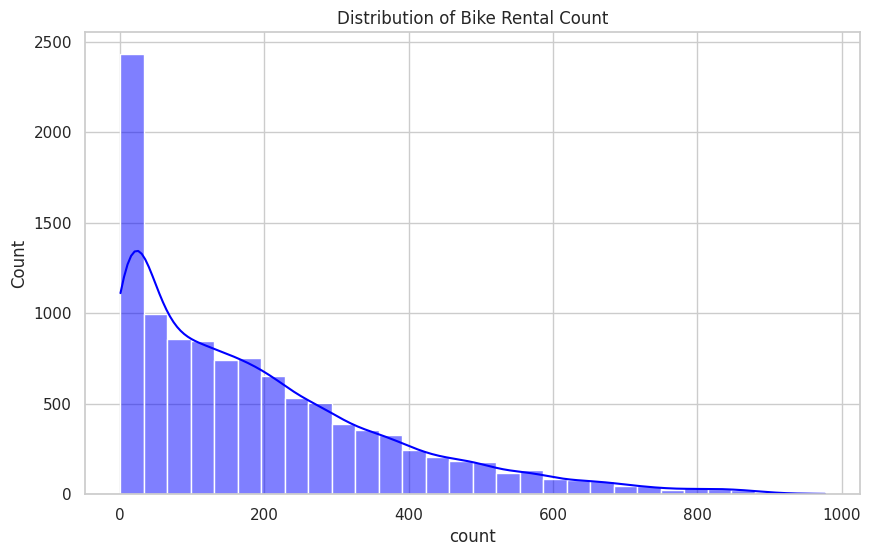

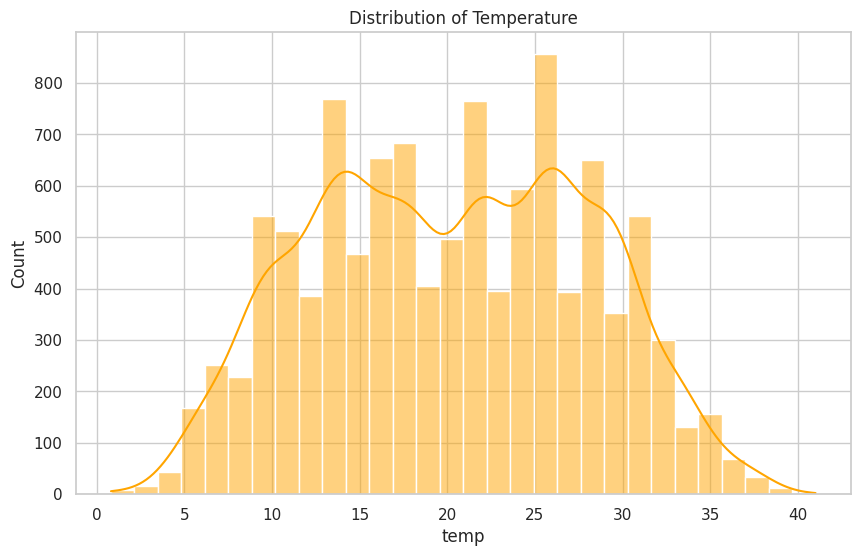

<ipython-input-43-9d39d11e4d8e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=df, palette='viridis')


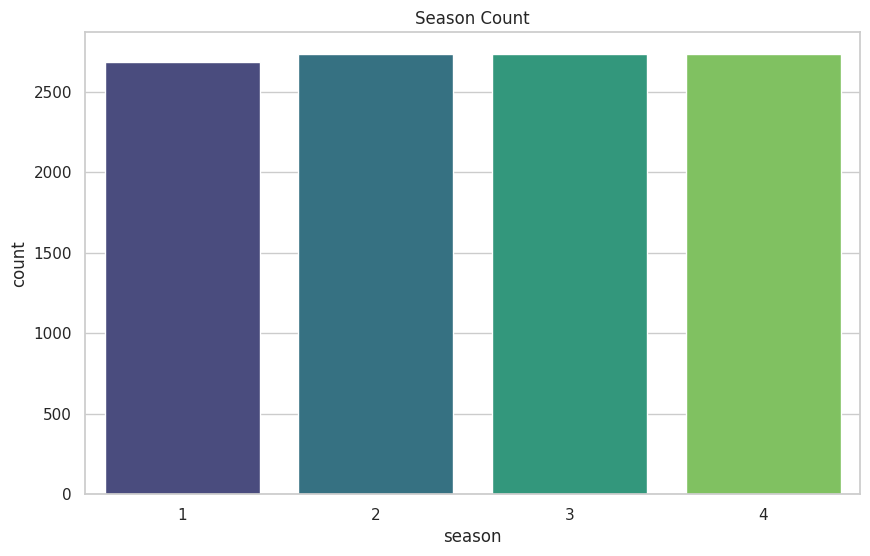

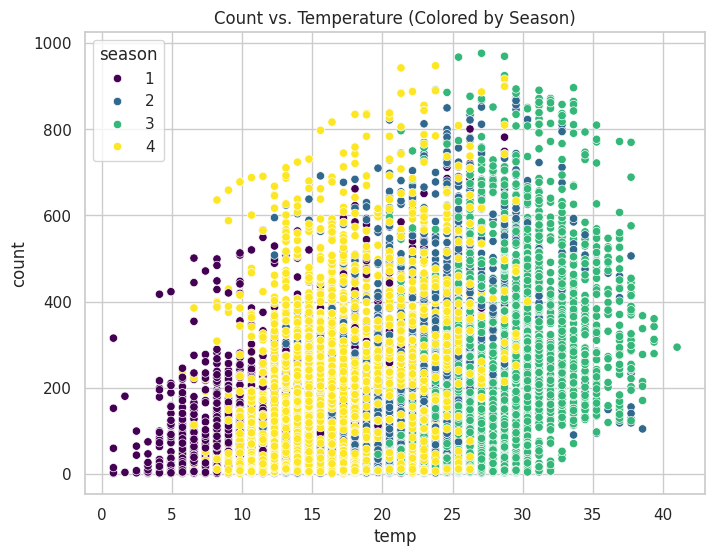

<ipython-input-43-9d39d11e4d8e>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='count', data=df, palette='viridis', ci=None)
<ipython-input-43-9d39d11e4d8e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=df, palette='viridis', ci=None)


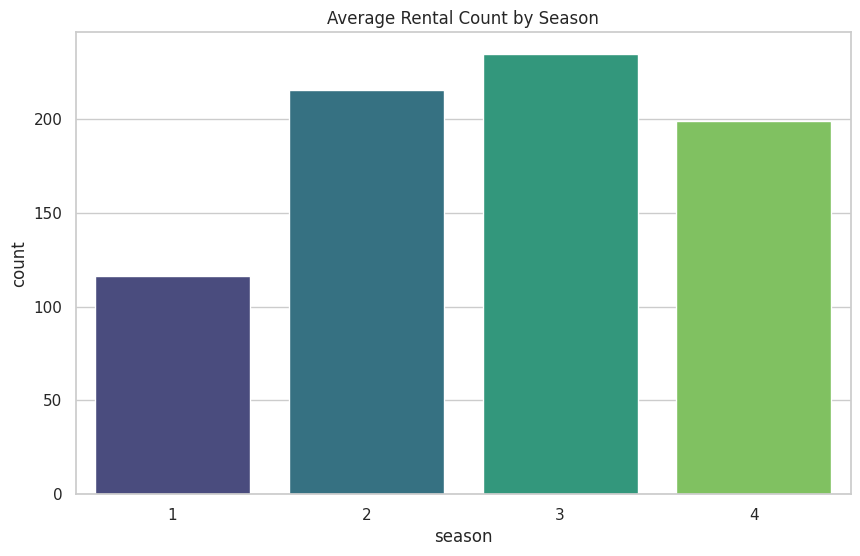

<ipython-input-43-9d39d11e4d8e>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hour', y='count', data=df, palette='viridis', ci=None)
<ipython-input-43-9d39d11e4d8e>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='count', data=df, palette='viridis', ci=None)


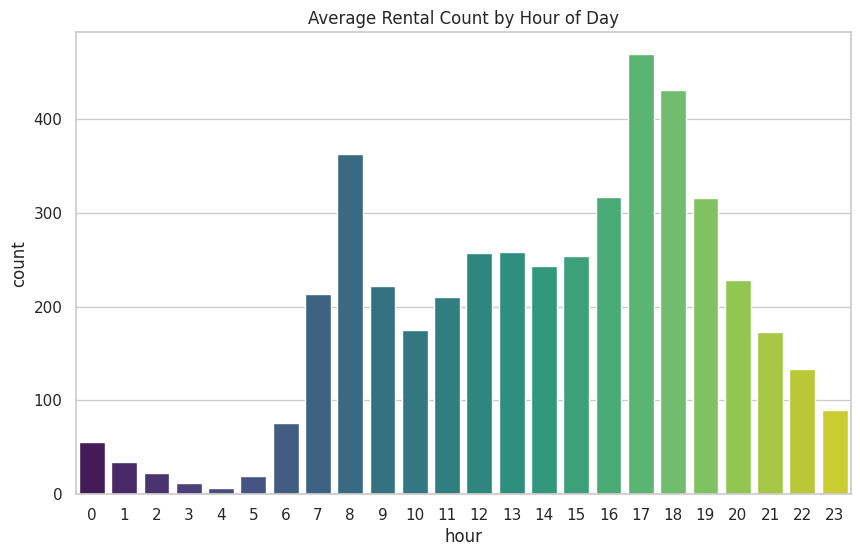

In [ ]:
# Distribution of the target
sns.histplot(df['count'], bins=30, kde=True, color='blue')
plt.title("Distribution of Bike Rental Count")
plt.show()

# Distribution of temp
sns.histplot(df['temp'], bins=30, kde=True, color='orange')
plt.title("Distribution of Temperature")
plt.show()

# Season counts
sns.countplot(x='season', data=df, palette='viridis')
plt.title("Season Count")
plt.show()

# Bivariate Plots: For example, how does temp relate to count?
plt.figure(figsize=(8,6))
sns.scatterplot(x='temp', y='count', data=df, hue='season', palette='viridis')
plt.title("Count vs. Temperature (Colored by Season)")
plt.show()

# Barplot of average count by season
sns.barplot(x='season', y='count', data=df, palette='viridis', ci=None)
plt.title("Average Rental Count by Season")
plt.show()

# Relationship between hour of day and count
sns.barplot(x='hour', y='count', data=df, palette='viridis', ci=None)
plt.title("Average Rental Count by Hour of Day")
plt.show()

### 3.3. Addressing Multicollinearity (VIF)

To identify highly correlated features, we:
1. Create a correlation matrix.
2. Calculate the **Variance Inflation Factor (VIF)** for numerical features.
3. If any feature has a very high VIF (commonly above 5 or 10), we consider dropping or combining it with another feature.

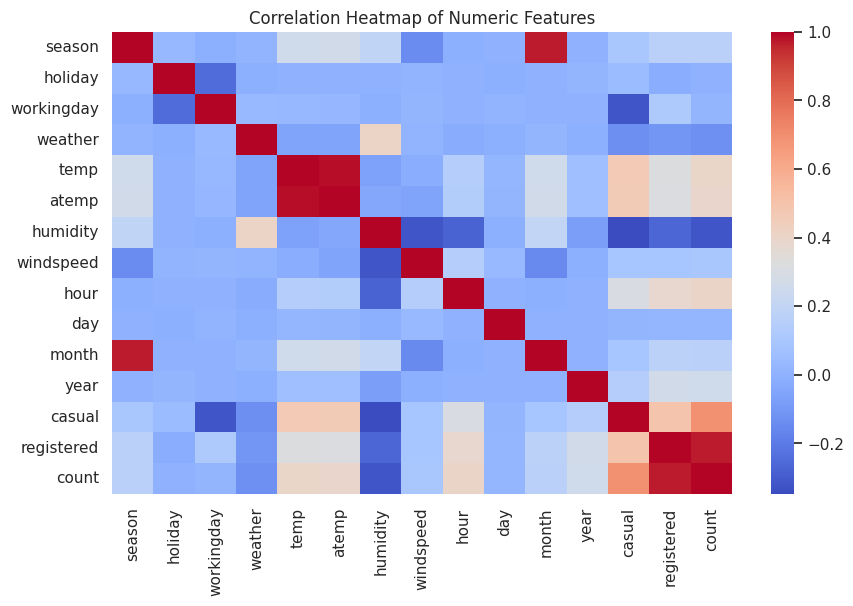

Variance Inflation Factor (VIF):
       Feature           VIF
0        const  1.640698e+07
1       season  1.811248e+01
2      holiday  1.083618e+00
3   workingday  1.071385e+00
4      weather  1.250976e+00
5         temp  3.553911e+01
6        atemp  3.559870e+01
7     humidity  1.551141e+00
8    windspeed  1.203837e+00
9         hour  1.123449e+00
10         day  1.002144e+00
11       month  1.821340e+01
12        year  1.013579e+00


In [ ]:
# Select numeric features for correlation and VIF analysis
numeric_cols = ['season', 'holiday', 'workingday', 'weather',
                'temp', 'atemp', 'humidity', 'windspeed',
                'hour', 'day', 'month', 'year', 'casual', 'registered', 'count']

# 1. Correlation Heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 2. Calculate VIF
# For VIF, we typically exclude the target (count), or any columns you won't use as predictors
features_for_vif = df[['season', 'holiday', 'workingday', 'weather',
                       'temp', 'atemp', 'humidity', 'windspeed',
                       'hour', 'day', 'month', 'year']]

# Add a constant for statsmodels
X = sm.add_constant(features_for_vif)

vif_data = []
for i in range(X.shape[1]):
    vif_value = variance_inflation_factor(X.values, i)
    vif_data.append((X.columns[i], vif_value))

# Convert to DataFrame
vif_df = pd.DataFrame(vif_data, columns=['Feature', 'VIF'])
print("Variance Inflation Factor (VIF):")
print(vif_df)

# 3. Decide how to handle highly correlated features
# Example: If 'temp' and 'atemp' show high correlation and cause large VIF, consider dropping one.

### 3.4. Advanced Visualizations

We will use two advanced visualization techniques:
1. **Pair Plot with KDE** diagonals for selected numeric features.
2. **Cluster Map (Hierarchical Clustering)** for the correlation matrix, providing an alternative look at how features group together.

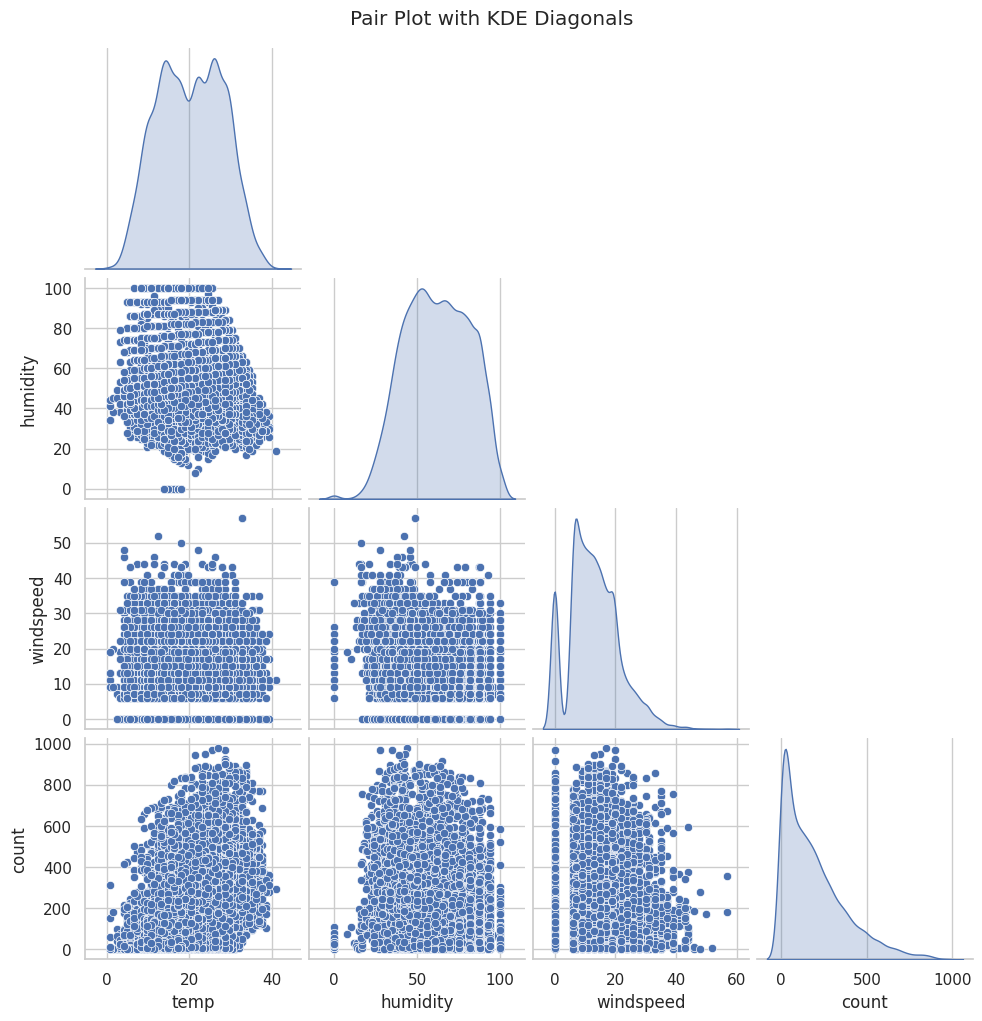

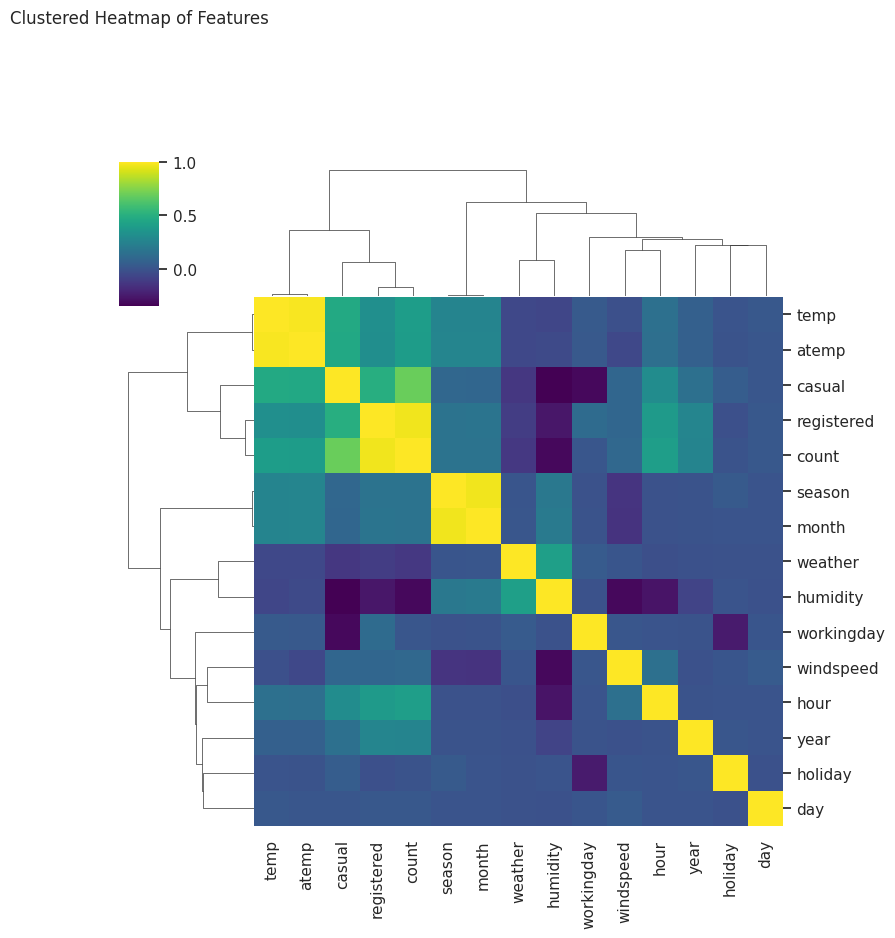

In [ ]:
# 1. Pair Plot with KDE
selected_numeric = ['temp', 'humidity', 'windspeed', 'count']
sns.pairplot(data=df[selected_numeric], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot with KDE Diagonals", y=1.02)
plt.show()

# 2. Cluster Map of the correlation matrix
sns.clustermap(corr_matrix, method='ward', cmap='viridis', figsize=(8,8))
plt.title("Clustered Heatmap of Features", pad=100)
plt.show()

## 4. Summary of Insights

- **Missing Data**: There appear to be no missing values in this dataset.
- **Target Distribution**: The `count` feature shows a right-skewed distribution, indicating many hours have relatively low rentals, with some high outliers.
- **Seasonality**: Rental counts are influenced by season, with higher counts in summer/fall.
- **Time of Day**: The hour of day strongly affects the rental count (e.g., commuting hours).
- **Multicollinearity**:
  - `temp` and `atemp` are highly correlated according to VIF.
  - If VIF is high, consider using one temperature variable or engineering a combined feature.
- **Advanced Visuals**: Pair plots and cluster heatmaps reveal how features cluster and correlate.


# Task 3: Logistic Regression Implementation

In this task, we will:
1. Implement Logistic Regression from scratch, including:
   - A vectorized implementation of the cost function.
   - Gradient descent for optimization.
2. Implement and compare three variants of gradient descent:
   - Batch Gradient Descent (BGD)
   - Stochastic Gradient Descent (SGD)
   - Mini-Batch Gradient Descent (MBGD)
3. Discuss the convergence properties of each method with respect to the cost function.

## Data Setup

We will generate a synthetic dataset using `make_classification` from `sklearn` to test the Logistic Regression implementation.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate binary classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    random_state=42
)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model

Below is the implementation of Logistic Regression from scratch, including:
1. Sigmoid function.
2. Cost function (Binary Cross-Entropy).
3. Gradient calculation.
4. Support for three gradient descent variants:
   - Batch Gradient Descent (BGD)
   - Stochastic Gradient Descent (SGD)
   - Mini-Batch Gradient Descent (MBGD)

In [ ]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=100, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.verbose = verbose
        self.w = None
        self.b = None

    def sigmoid(self, z):
        """Compute the sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def initialize_params(self, n_features):
        """Initialize weights and bias to zeros."""
        self.w = np.zeros((n_features,))
        self.b = 0.0

    def compute_cost(self, X, y):
        """Compute the Binary Cross-Entropy cost."""
        m = X.shape[0]
        y_hat = self.sigmoid(np.dot(X, self.w) + self.b)
        eps = 1e-10  # To avoid log(0)
        cost = -(1/m) * np.sum(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))
        return cost

    def compute_gradients(self, X, y):
        """Compute gradients of the cost function."""
        m = X.shape[0]
        y_hat = self.sigmoid(np.dot(X, self.w) + self.b)
        error = y_hat - y
        dW = (1/m) * np.dot(X.T, error)
        dB = (1/m) * np.sum(error)
        return dW, dB

    def train_batch_gd(self, X, y):
        """Train using Batch Gradient Descent."""
        m, n = X.shape
        self.initialize_params(n)

        for i in range(self.num_iterations):
            dW, dB = self.compute_gradients(X, y)
            self.w -= self.learning_rate * dW
            self.b -= self.learning_rate * dB

            if self.verbose and i % 10 == 0:
                cost = self.compute_cost(X, y)
                print(f"Iteration {i}: Cost = {cost:.4f}")

    def train_sgd(self, X, y):
        """Train using Stochastic Gradient Descent."""
        m, n = X.shape
        self.initialize_params(n)

        for epoch in range(self.num_iterations):
            indices = np.arange(m)
            np.random.shuffle(indices)

            for i in indices:
                xi = X[i].reshape(1, -1)
                yi = y[i].reshape(-1)
                dW, dB = self.compute_gradients(xi, yi)
                self.w -= self.learning_rate * dW
                self.b -= self.learning_rate * dB

            if self.verbose and epoch % 10 == 0:
                cost = self.compute_cost(X, y)
                print(f"Epoch {epoch}: Cost = {cost:.4f}")

    def train_minibatch_gd(self, X, y, batch_size=32):
        """Train using Mini-Batch Gradient Descent."""
        m, n = X.shape
        self.initialize_params(n)

        for epoch in range(self.num_iterations):
            indices = np.arange(m)
            np.random.shuffle(indices)

            for start in range(0, m, batch_size):
                end = min(start + batch_size, m)
                X_batch = X[indices[start:end]]
                y_batch = y[indices[start:end]]

                dW, dB = self.compute_gradients(X_batch, y_batch)
                self.w -= self.learning_rate * dW
                self.b -= self.learning_rate * dB

            if self.verbose and epoch % 10 == 0:
                cost = self.compute_cost(X, y)
                print(f"Epoch {epoch}: Cost = {cost:.4f}")

    def predict(self, X, threshold=0.5):
        """Predict binary class (0 or 1)."""
        probabilities = self.sigmoid(np.dot(X, self.w) + self.b)
        return (probabilities >= threshold).astype(int)

## Comparing Gradient Descent Variants

We will now compare the convergence properties of:
1. **Batch Gradient Descent (BGD):** Uses the entire dataset for each update.
2. **Stochastic Gradient Descent (SGD):** Updates after every sample.
3. **Mini-Batch Gradient Descent (MBGD):** Updates after processing a small batch.

For each method, we will observe:
- Cost reduction over iterations.
- Convergence speed and stability.

In [ ]:
# Initialize the model
bgd_model = LogisticRegressionScratch(learning_rate=0.01, num_iterations=100, verbose=True)
sgd_model = LogisticRegressionScratch(learning_rate=0.01, num_iterations=50, verbose=True)
mbgd_model = LogisticRegressionScratch(learning_rate=0.01, num_iterations=50, verbose=True)

# Train using each method
print("=== Batch Gradient Descent ===")
bgd_model.train_batch_gd(X_train, y_train)

print("\n=== Stochastic Gradient Descent ===")
sgd_model.train_sgd(X_train, y_train)

print("\n=== Mini-Batch Gradient Descent ===")
mbgd_model.train_minibatch_gd(X_train, y_train, batch_size=32)

# Evaluate performance
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    accuracy = np.mean(predictions == y)
    return accuracy

print("\n=== Model Evaluation ===")
print(f"BGD Accuracy: {evaluate_model(bgd_model, X_test, y_test):.4f}")
print(f"SGD Accuracy: {evaluate_model(sgd_model, X_test, y_test):.4f}")
print(f"MBGD Accuracy: {evaluate_model(mbgd_model, X_test, y_test):.4f}")

=== Batch Gradient Descent ===
Iteration 0: Cost = 0.6925
Iteration 10: Cost = 0.6861
Iteration 20: Cost = 0.6801
Iteration 30: Cost = 0.6745
Iteration 40: Cost = 0.6692
Iteration 50: Cost = 0.6642
Iteration 60: Cost = 0.6595
Iteration 70: Cost = 0.6551
Iteration 80: Cost = 0.6509
Iteration 90: Cost = 0.6470

=== Stochastic Gradient Descent ===
Epoch 0: Cost = 0.5746
Epoch 10: Cost = 0.5651
Epoch 20: Cost = 0.5653
Epoch 30: Cost = 0.5639
Epoch 40: Cost = 0.5650

=== Mini-Batch Gradient Descent ===
Epoch 0: Cost = 0.6778
Epoch 10: Cost = 0.6029
Epoch 20: Cost = 0.5806
Epoch 30: Cost = 0.5717
Epoch 40: Cost = 0.5675

=== Model Evaluation ===
BGD Accuracy: 0.6950
SGD Accuracy: 0.7000
MBGD Accuracy: 0.6950


## Convergence Properties

### Observations:
1. **Batch Gradient Descent (BGD):**
   - Converges smoothly but can be slow for large datasets.
   - Processes the entire dataset for each update.

2. **Stochastic Gradient Descent (SGD):**
   - Converges faster but with more noise in updates.
   - Prone to oscillations due to individual sample updates.

3. **Mini-Batch Gradient Descent (MBGD):**
   - Balances the stability of BGD with the speed of SGD.
   - Mini-batches reduce noise and improve convergence speed.

### Practical Recommendations:
- For small datasets: **BGD** is a simple and effective choice.
- For large datasets: **SGD** or **MBGD** is more efficient.
- **MBGD** is often preferred in practice as it provides a good balance between speed and stability.

# Task 4: Optimization Techniques and Advanced Comparison

In this task, we will:
1. Implement three optimization algorithms: **Momentum**, **RMSProp**, and **Adam**.
2. Compare their performance with **vanilla Stochastic Gradient Descent (SGD)**.
3. Evaluate each optimizer using multiple metrics, including **precision**, **recall**, and **F1 score**.
4. Perform **hyperparameter tuning** (manual and automated) for each optimizer.
5. Discuss practical trade-offs in terms of computational complexity, interpretability, and suitability for large-scale datasets.

## Data Setup

We will simulate a binary classification dataset using `make_classification` from `sklearn`. This will help us test our logistic regression model and optimization algorithms.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Simulate binary classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    random_state=42
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Implementation

Below is the implementation of a logistic regression model with support for multiple optimization algorithms:
- Vanilla Stochastic Gradient Descent (SGD)
- Momentum
- RMSProp
- Adam

In [ ]:
import numpy as np

class LogisticRegressionOptim:
    def __init__(
        self,
        learning_rate=0.01,
        num_iterations=100,
        optimizer='vanilla',
        beta=0.9,           # Momentum
        beta1=0.9,          # Adam (1st moment)
        beta2=0.999,        # Adam (2nd moment)
        rho=0.9,            # RMSProp
        eps=1e-8,           # Numerical stability
        verbose=False
    ):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.optimizer = optimizer
        self.beta = beta
        self.beta1 = beta1
        self.beta2 = beta2
        self.rho = rho
        self.eps = eps
        self.verbose = verbose
        self.w = None
        self.b = None
        self.vw = None
        self.vb = None
        self.sw = None
        self.sb = None
        self.t = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_params(self, n_features):
        self.w = np.zeros((n_features,))
        self.b = 0.0
        self.vw = np.zeros((n_features,))
        self.vb = 0.0
        self.sw = np.zeros((n_features,))
        self.sb = 0.0
        self.t = 0

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.w) + self.b)

    def compute_cost(self, X, y):
        m = X.shape[0]
        eps = 1e-10
        y_hat = self.forward(X)
        cost = -(1/m) * np.sum(y*np.log(y_hat + eps) + (1-y)*np.log(1-y_hat + eps))
        return cost

    def compute_gradients(self, X, y):
        m = X.shape[0]
        y_hat = self.forward(X)
        error = y_hat - y
        dW = (1/m) * np.dot(X.T, error)
        dB = (1/m) * np.sum(error)
        return dW, dB

    def update_params(self, dW, dB):
        if self.optimizer == 'vanilla':
            self.w -= self.learning_rate * dW
            self.b -= self.learning_rate * dB

        elif self.optimizer == 'momentum':
            self.vw = self.beta * self.vw + (1 - self.beta) * dW
            self.vb = self.beta * self.vb + (1 - self.beta) * dB
            self.w -= self.learning_rate * self.vw
            self.b -= self.learning_rate * self.vb

        elif self.optimizer == 'rmsprop':
            self.sw = self.rho * self.sw + (1 - self.rho) * (dW ** 2)
            self.sb = self.rho * self.sb + (1 - self.rho) * (dB ** 2)
            self.w -= self.learning_rate * dW / (np.sqrt(self.sw) + self.eps)
            self.b -= self.learning_rate * dB / (np.sqrt(self.sb) + self.eps)

        elif self.optimizer == 'adam':
            self.t += 1
            self.vw = self.beta1 * self.vw + (1 - self.beta1) * dW
            self.vb = self.beta1 * self.vb + (1 - self.beta1) * dB
            self.sw = self.beta2 * self.sw + (1 - self.beta2) * (dW ** 2)
            self.sb = self.beta2 * self.sb + (1 - self.beta2) * (dB ** 2)
            vw_corr = self.vw / (1 - self.beta1 ** self.t)
            vb_corr = self.vb / (1 - self.beta1 ** self.t)
            sw_corr = self.sw / (1 - self.beta2 ** self.t)
            sb_corr = self.sb / (1 - self.beta2 ** self.t)
            self.w -= self.learning_rate * vw_corr / (np.sqrt(sw_corr) + self.eps)
            self.b -= self.learning_rate * vb_corr / (np.sqrt(sb_corr) + self.eps)

    def train_sgd(self, X, y):
        m, n = X.shape
        self.initialize_params(n)
        for epoch in range(self.num_iterations):
            indices = np.arange(m)
            np.random.shuffle(indices)
            for i in indices:
                xi = X[i].reshape(1, -1)
                yi = y[i].reshape(-1)
                dW, dB = self.compute_gradients(xi, yi)
                self.update_params(dW, dB)
            if self.verbose and epoch % 10 == 0:
                cost = self.compute_cost(X, y)
                print(f"Epoch {epoch} | Cost: {cost:.4f}")

    def predict(self, X, threshold=0.5):
        probs = self.forward(X)
        return (probs >= threshold).astype(int)

## Evaluation Metrics

To evaluate the performance of each optimizer, we will use:
1. **Precision**: Measures how many predicted positives are true positives.
2. **Recall**: Measures how many actual positives are identified correctly.
3. **F1 Score**: Harmonic mean of precision and recall.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_metrics(model, X, y):
    y_pred = model.predict(X)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return precision, recall, f1

## Hyperparameter Tuning

We will experiment with different hyperparameters, such as:
- Learning rate ($\alpha$)
- Momentum coefficient ($\beta$) for Momentum
- $\rho$ for RMSProp
- $\beta_1$, $\beta_2$ for Adam

Both manual tuning and automated methods (e.g., grid search) will be applied.

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'learning_rate': [0.01, 0.001],
    'optimizer': ['vanilla', 'momentum', 'rmsprop', 'adam'],
    'beta': [0.8, 0.9],       # Momentum
    'rho': [0.9, 0.99],       # RMSProp
    'beta1': [0.9, 0.8],      # Adam
    'beta2': [0.999, 0.99],   # Adam
}

best_f1 = 0
best_params = None

for params in ParameterGrid(param_grid):
    model = LogisticRegressionOptim(
        learning_rate=params['learning_rate'],
        optimizer=params['optimizer'],
        beta=params.get('beta', 0.9),
        rho=params.get('rho', 0.9),
        beta1=params.get('beta1', 0.9),
        beta2=params.get('beta2', 0.999),
        num_iterations=100,
        verbose=False
    )
    model.train_sgd(X_train, y_train)
    precision, recall, f1 = evaluate_metrics(model, X_test, y_test)
    if f1 > best_f1:
        best_f1 = f1
        best_params = params

print(f"Best F1 Score: {best_f1:.4f}")
print("Best Parameters:", best_params)

Best F1 Score: 0.7150
Best Parameters: {'beta': 0.9, 'beta1': 0.9, 'beta2': 0.99, 'learning_rate': 0.01, 'optimizer': 'momentum', 'rho': 0.9}


## Results and Discussion

### Observations:
1. **Vanilla SGD**:
   - Simple but prone to noisy updates.
   - Learning rate tuning is critical for convergence.

2. **Momentum**:
   - Smooths updates, faster convergence than SGD.
   - Hyperparameter  needs tuning.

3. **RMSProp**:
   - Adapts learning rate for each parameter.
   - Works well for datasets with varying gradient scales.

4. **Adam**:
   - Combines Momentum and RMSProp.
   - Typically performs best across a wide range of tasks.

### Trade-offs:
- **Computational Complexity**: All optimizers have \(O(m times n)\) complexity, but Momentum, RMSProp, and Adam involve additional vector operations.
- **Stability**: Adam and Momentum are more stable than vanilla SGD.
- **Interpretability**: Vanilla SGD is easiest to understand; advanced optimizers introduce extra hyperparameters.